# Airbnb in New York City!
Authors: Joona Kim, Hannah Zhou, Hemanth Battu

Welcome to your first data exploration project! In your final role as a data analyst at Airbnb, you will be applying skills that you already learned in our Data Wrangling course, as well as learning new skills on the way to analyze a comprehensive AirBnb dataset of New York City. You will be visualizing observations and making interesting conclusions from this dataset. Additionally, you will build a simple predictive model that can be used by a host to help them figure out the best price to list their property.

Let's get started!

## Import Statements
These are the libraries which you will be using for this project. Do __not__ edit these.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Our Airbnb Dataset
Go ahead and run this cell to read our __`airbnb`__ dataset from __`nyc_listings.csv`__. Take a moment to scroll through our dataset to get a feel for what we are working with.

In [50]:
airbnb = pd.read_csv('nyc_listings.csv')
airbnb

,name,host_id,host_name,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,...,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,reviews_per_month
0,Modern NYC,2259,Jenny,8/18/2008,Washington Heights,Manhattan,10040,40.85722,-73.93790,Other,...,NaN,1.0,2.0,$100.00,1,1,730,1,1,0.01
1,Skylit Midtown Castle,2845,Jennifer,9/9/2008,Midtown,Manhattan,10018,40.75362,-73.98377,Apartment,...,1.0,0.0,1.0,$225.00,1,3,1125,365,48,0.38
2,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,12/7/2008,Clinton Hill,Brooklyn,11238,40.68514,-73.95976,Guest suite,...,1.0,1.0,4.0,$89.00,1,1,730,261,318,4.66
3,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2/2/2009,Murray Hill,Manhattan,10016,40.74767,-73.97500,Apartment,...,1.0,1.0,1.0,$200.00,2,3,21,0,78,0.58
4,BlissArtsSpace!,7356,Garon,2/3/2009,Bedford-Stuyvesant,Brooklyn,11216,40.68688,-73.95596,Apartment,...,NaN,1.0,1.0,$60.00,1,29,730,365,50,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50241,★☆Sunnyside☆★ Locals' favorite neighbor for li...,200239515,Shogo,7/5/2018,Sunnyside,Queens,11104,40.73816,-73.92574,Townhouse,...,1.0,1.0,1.0,$29.00,1,28,1125,54,0,NaN
50242,★☆Sunnyside☆★ Locals favorite neighbor for living,19303369,Hiroki,8/1/2014,Sunnyside,Queens,11104,40.73846,-73.92761,Townhouse,...,1.0,1.0,1.0,$35.00,1,28,1125,54,0,NaN
50243,★☆Sunnyside☆★ Locals' favorite neighbor for li...,19303369,Hiroki,8/1/2014,Sunnyside,Queens,11104,40.73936,-73.92748,Townhouse,...,1.0,1.0,1.0,$29.00,1,28,1125,54,0,NaN
50244,★☆Sunnyside☆★ Locals favorite neighbor for living,204704622,Momoyo,7/24/2018,Sunnyside,Queens,11104,40.73939,-73.92766,Townhouse,...,1.0,1.0,1.0,$35.00,1,28,1125,54,0,NaN


## 4.3) Preparation and Cleaning


### Size of our Dataset

In [51]:
len(airbnb)

50246

We can see that this is a pretty comprehensive dataset. We have 50,256 listings comprised of 16 unique attributes for each listing.

### Data Types of Column Values
This function checks the _type_ of every column in the dataset.

In [52]:
airbnb.dtypes

name                             object
host_id                           int64
host_name                        object
host_since                       object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
zipcode                          object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                            object
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_365                  int64
number_of_reviews                 int64
reviews_per_month               float64
dtype: object

Here, we can make a few observations. If we want to continue with our data exploration, we must convert the values of our _price_ column into integers and the values of our _host_since_ column into _datetime_ objects. Additionally, there are a couple of columns that we do not need for our analytics, and thus we must remove them. Null values are evident in the dataframe above, and they must be accounted for as well.

### Handling Null Data

##### Summarizing Null Data
Write a line of code that returns a printed output of the sum of null values in each column of airbnb dataset.

_Hint_: The __`isna`__ function taught in Day 3 should come in handy.

In [53]:
## fill your code in here
airbnb.isna().sum()

name                               18
host_id                             0
host_name                          11
host_since                         11
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
zipcode                           437
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          72
bedrooms                          121
beds                              528
price                               0
guests_included                     0
minimum_nights                      0
maximum_nights                      0
availability_365                    0
number_of_reviews                   0
reviews_per_month               11030
dtype: int64

##### Dropping Columns
Remove _name_, _host_name_, _host_id_, and _zipcode_. Overwrite __`airbnb`__ with a new dataframe with these columns removed.

In [54]:
## fill your code in here
airbnb = airbnb.drop(columns = ['name', 'host_name', 'zipcode', 'host_id'])

##### Extracting Rows
Overwrite __`airbnb`__ with a new dataframe where the rows with null values in _host_since_ are removed.

In [55]:
## fill your code in here
airbnb = airbnb[airbnb['host_since'].notna()]

##### Replacing Values
Replace all the remaining null values in the dataframe with 0.

_Hint_: Refer back to Day 3 for how the __`replace`__ function can be used to handle this.

In [56]:
## fill your code in here
airbnb.replace(np.nan, 0, inplace=True)

__Checkpoint:__ Great job! Check that we have accounted for all our null data by using the __`isna`__ function again.

In [57]:
## fill your code in here
airbnb.isna().sum()

host_since                      0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
availability_365                0
number_of_reviews               0
reviews_per_month               0
dtype: int64

### Transforming Data Using a Function or Mapping
Our next order of business is to change the types of our _host_since_ and _price_ columns so that we can use them for our analysis. Recall that these columns were both objects, most likely of _string_ type. We need to convert the values of our _price_ column into an _int_ type and the values of our _host_since_ column into a _datetime_ object.

##### Mapping a Function
Write a function named __`convert_to_int`__ that takes in a string (in the format specified on Stepik) and returns an integer. We recommend you follow the pseudocode outlined on Stepik.

_Hint_: The __`strip`__ and __`replace`__ functions will come in handy. You can use string index notation to slice the string.

In [58]:
## fill your code in here
def convert_to_int(string):
    string = string.replace("$", '').replace(',', '').strip()
    string = string[:-3]
    return int(string)

If you'd like, you can insert additional cells to test your function.

Now, apply __`convert_to_int`__ to the values in the price column by making use of the __`map`__ function.

In [59]:
## fill your code in here
airbnb['price'] = airbnb['price'].map(convert_to_int)

##### Converting to Datetime object
Convert the values in the _housing_since_ column into _datetime_ objects.

In [60]:
## fill your code in here
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'])

__Checkpoint:__ You should see the difference in type, when running __`airbnb.dtypes`__ again.

In [61]:
airbnb.dtypes

host_since                      datetime64[ns]
neighbourhood_cleansed                  object
neighbourhood_group_cleansed            object
latitude                               float64
longitude                              float64
property_type                           object
room_type                               object
accommodates                             int64
bathrooms                              float64
bedrooms                               float64
beds                                   float64
price                                    int64
guests_included                          int64
minimum_nights                           int64
maximum_nights                           int64
availability_365                         int64
number_of_reviews                        int64
reviews_per_month                      float64
dtype: object

The values in _host_since_ should be of _datetime64[ns]_ and the values in _price_ should be _int64_.

### Renaming Columns
By running the below cell, it seems to be that _neighbourhood_group_cleansed_ represents the different boroughs of NYC. 

In [62]:
airbnb.get('neighbourhood_group_cleansed').unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Thus, _neighbourhood_cleansed_ must represent the different neighborhoods of NYC of where a listing is located. Overwrite the value __`airbnb`__ again, by this time renaming _neighbourhood_group_cleansed_ to _borough_ and _neighbourhood_cleansed_ to _neighborhood_.

In [63]:
## fill your code in here
airbnb = airbnb.rename(columns = {'neighbourhood_cleansed':'neighborhood', 'neighbourhood_group_cleansed':'borough'})

__Checkpoint:__ You can check your answer by the running the below cell.

In [64]:
airbnb.columns.values

array(['host_since', 'neighborhood', 'borough', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'reviews_per_month'], dtype=object)

### Removing Outliers

In [65]:
len(airbnb.get('neighborhood').unique())

223

Notice the large quantity of unique neighborhoods. Why must we simplify? Run the cell below to get a better idea.

In [66]:
airbnb.groupby('neighborhood').size().sort_values(ascending = False)

neighborhood
Williamsburg                  3805
Bedford-Stuyvesant            3792
Harlem                        2723
Bushwick                      2492
Hell's Kitchen                2153
                              ... 
Bay Terrace, Staten Island       1
Huguenot                         1
Country Club                     1
Rossville                        1
Fort Wadsworth                   1
Length: 223, dtype: int64

Some of the neighborhoods have barely any listings. These neighborhoods have a greater propensity to _skew_ our observations as the attributes for a listing in these neighborhoods are _not_ representative of the neighborhood itself. We must reduce our _neighborhood_ values so that we only work with active neighborhoods, as this will lead to more accurate observations.

Similarly, we want to remove any outlying _price_ values. Run the code below.

In [67]:
airbnb.get(['price']).describe()

,price
count,50235.000000
mean,163.137155
std,421.730998
min,0.000000
25%,68.000000
50%,104.000000
75%,175.000000
max,10000.000000


Look at the statistical table above and notice that we have some extreme values. The mean price is around \$163, while the standard deviation is an incredibly large amount, \$421. The maximum price is \$10,000, despite the third quartile (75th percentile) being \$175. We will need to account for this.

##### Removing Outlying Neighborhoods
Group every unique neighborhood that contains less than 10 listings into an array, named __`options`__. Then, overwrite __`airbnb`__ with a new dataframe where the neighborhoods in __`options`__ are not included. The steps listed in Stepik should give you a clearer idea on how to do this task.

In [68]:
##fill here
neighborhoods = airbnb.groupby('neighborhood').size()
options = neighborhoods[neighborhoods < 10].index.values
airbnb = airbnb[~airbnb['neighborhood'].isin(options)]

##### Removing Outlying Price Data
We need a way to remove outlying price data. We can do this by picking an upper-cutoff for price and focus only on the listings whose prices are below this cut-off. Our upper cut-off is the _97.5th_ percentile of prices for _each_ borough. Store the _indices_ of our current __`airbnb`__ dataframe of listings whose prices are greater than this cut-off, into an array. We have completed this process for Manhattan below. Your task is to do the same for the remaining boroughs.

In [69]:
manhattan_prices = airbnb[airbnb.get('borough') == 'Manhattan'].get('price').values
manhattan_percentile = int(np.percentile(manhattan_prices, 97.5))
manhattan_indices = airbnb[(airbnb.get('borough') == 'Manhattan') & (airbnb.get('price') > manhattan_percentile)].index.values

## fill your code in here
brooklyn_prices = airbnb[airbnb.get('borough') == 'Brooklyn'].get('price').values
brooklyn_percentile = int(np.percentile(brooklyn_prices, 97.5))
brooklyn_indices = airbnb[(airbnb.get('borough') == 'Brooklyn') & (airbnb.get('price') > brooklyn_percentile)].index.values

bronx_prices = airbnb[airbnb.get('borough') == 'Bronx'].get('price').values
bronx_percentile = int(np.percentile(bronx_prices, 97.5))
bronx_indices = airbnb[(airbnb.get('borough') == 'Bronx') & (airbnb.get('price') > bronx_percentile)].index.values

queens_prices = airbnb[airbnb.get('borough') == 'Queens'].get('price').values
queens_percentile = int(np.percentile(queens_prices, 97.5))
queens_indices = airbnb[(airbnb.get('borough') == 'Queens') & (airbnb.get('price') > queens_percentile)].index.values

staten_island_prices = airbnb[airbnb.get('borough') == 'Staten Island'].get('price').values
staten_island_percentile = int(np.percentile(staten_island_prices, 97.5))
staten_island_indices = airbnb[(airbnb.get('borough') == 'Staten Island') & (airbnb.get('price') > staten_island_percentile)].index.values

Concatenate these arrays of indices into a singular array, named __`unwanted_indices`__. Then, overwrite __`airbnb`__ with a new dataframe, where the indices in __`unwanted_indices`__ are __not__ present in the new dataframe.

_Hint:_ The __`np.concatenate`__ function can merge arrays. The __`drop`__ function can take in an array of indices to drop.

In [70]:
## fill your code in here
unwanted_indices = np.concatenate([manhattan_indices, brooklyn_indices, bronx_indices, queens_indices, staten_island_indices])
airbnb = airbnb.drop(unwanted_indices)

## 4.4) Exploring and Visualizing Our Dataset

### At What Cost?

##### Calculating the Standard Deviation
Calculate the measure of variation of the prices of listings in NYC with the appropriate Pandas function.

In [71]:
## fill your code in here
airbnb["price"].std()

90.78401699088329

### Narrowing it Down

##### Finding the Average Listing Price for Each Borough
Find the _average_ price for each borough.

*Hint:* Use the __`groupby`__ method.

In [72]:
## fill your code in here
airbnb.groupby('borough').mean().get('price')

borough
Bronx             78.780035
Brooklyn         107.921133
Manhattan        165.117857
Queens            85.496658
Staten Island     82.118644
Name: price, dtype: float64

###### Finding the Median Price for Each Borough
Find the _median_ price for each borough.

In [73]:
## fill your code in here
airbnb.groupby('borough').median().get('price')

borough
Bronx             65.0
Brooklyn          90.0
Manhattan        140.0
Queens            70.0
Staten Island     70.0
Name: price, dtype: float64

### Visualizing the Price Distribution
Let's visualize these observations.

##### Bar Charts
Plot two bar charts, in _descending_ size, that shows the categorical distributions of the _mean_ and the _median_ price for each borough.

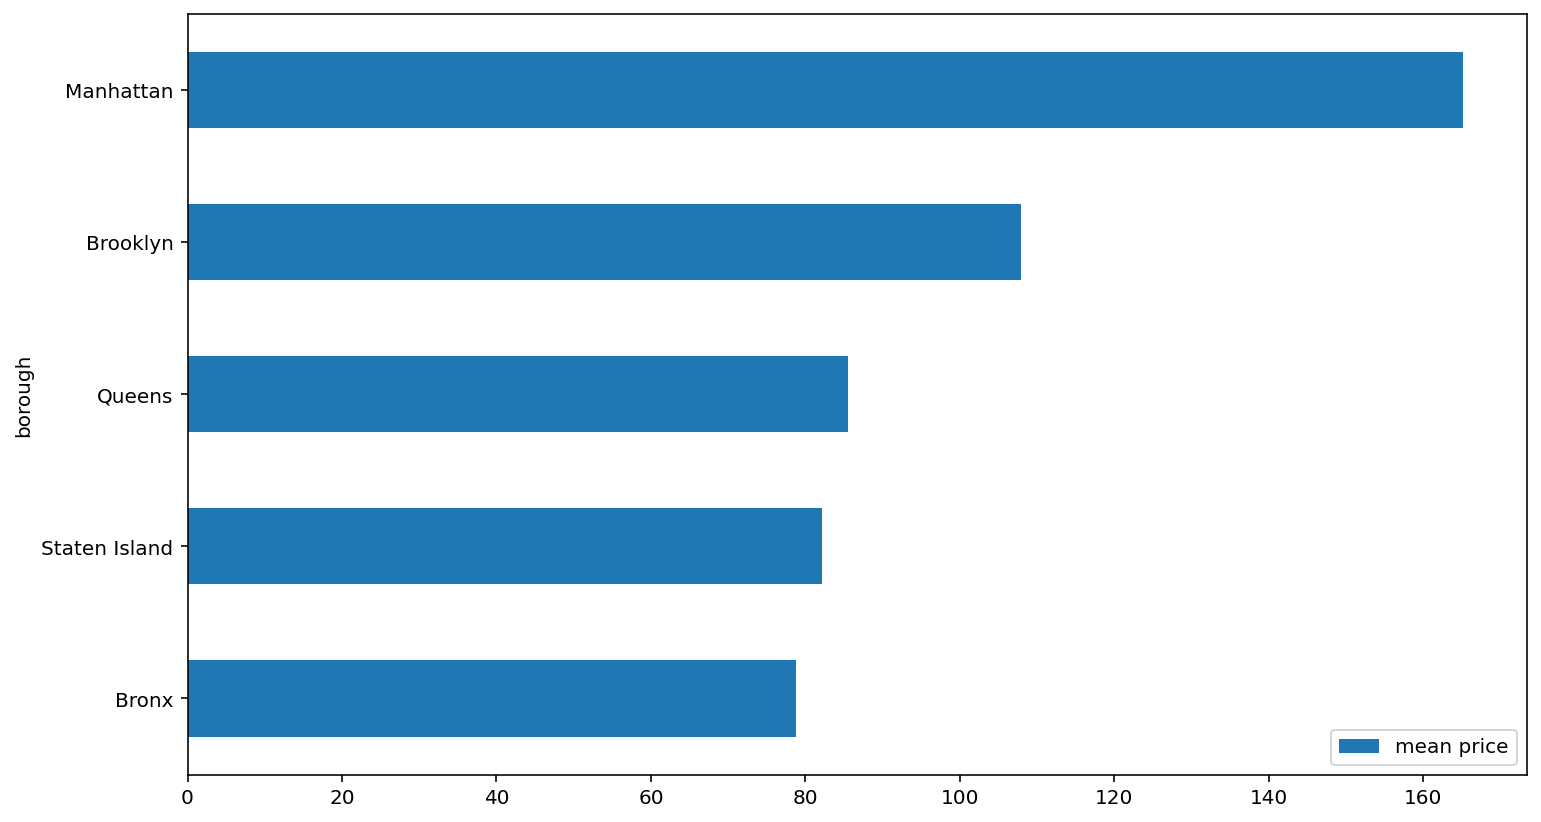

In [74]:
##plot bar chart for avg. price here
airbnb.groupby('borough').mean().sort_values(by = 'price').plot(kind = 'barh', y = 'price', label = 'mean price')

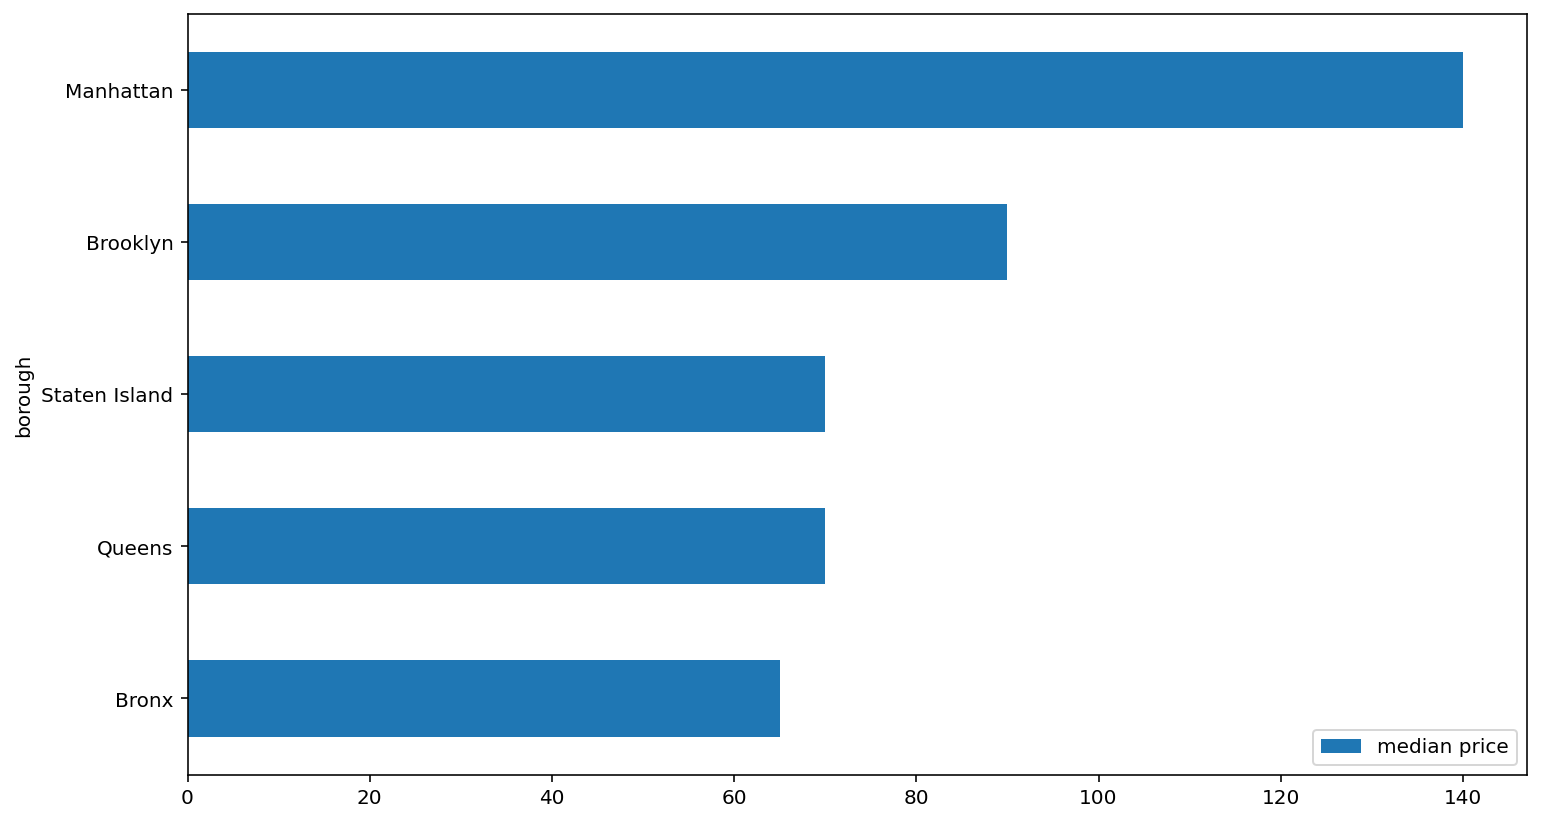

In [75]:
##plot bar chart for median price here
airbnb.groupby('borough').median().sort_values(by = 'price').plot(kind = 'barh', y = 'price',label = 'median price')

##### Histograms
Plot five histograms that displays the price distributions for each borough, in the interval [0, 800] and a bin size of 50.

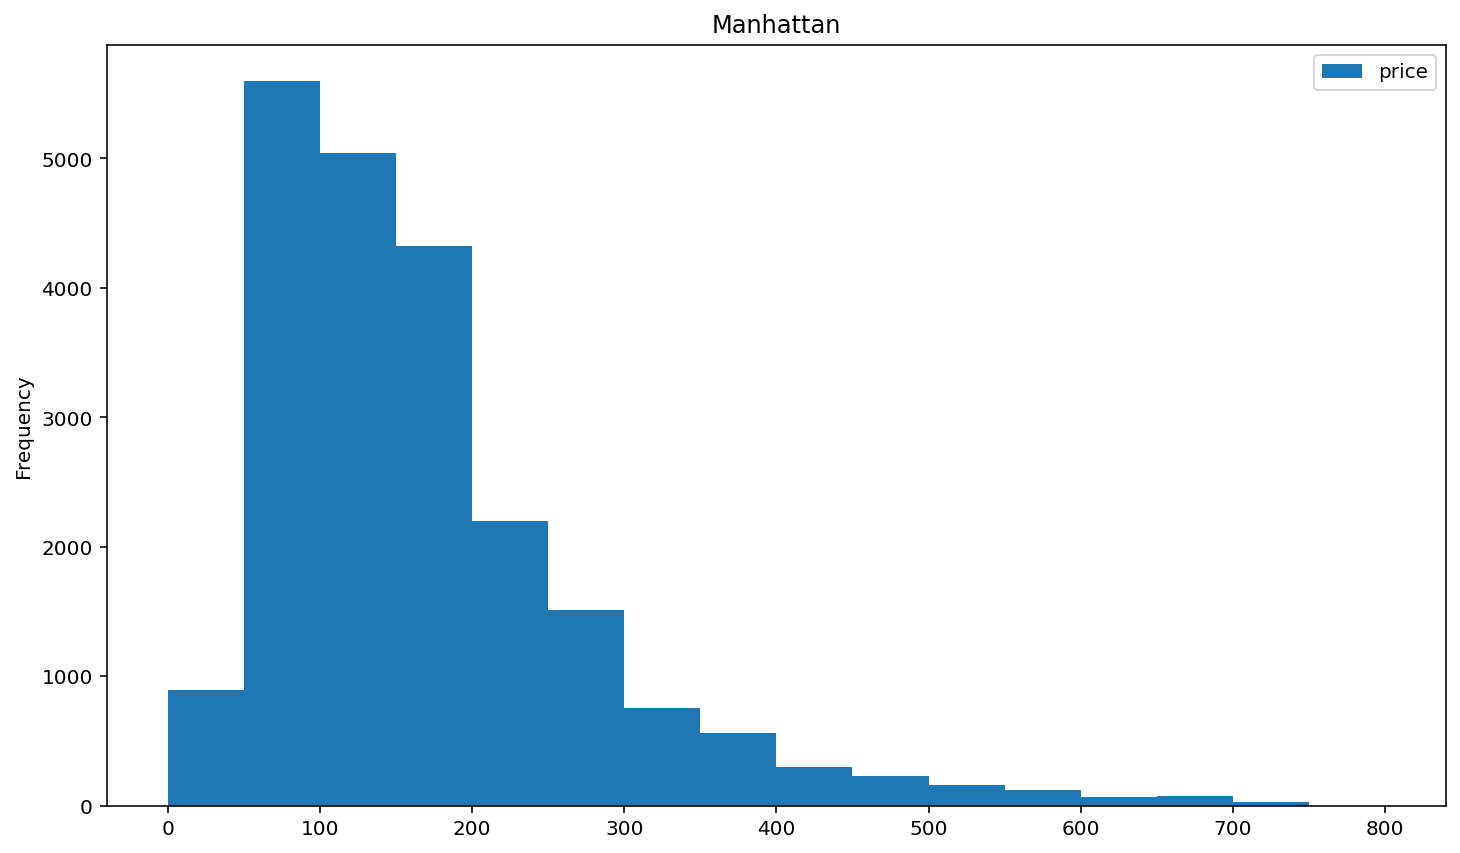

In [76]:
##plot manhattan price distribution here
airbnb[airbnb.get('borough') == 'Manhattan'].get(['price']).plot(kind = 'hist', title = 'Manhattan', bins = np.arange(0, 801,50))

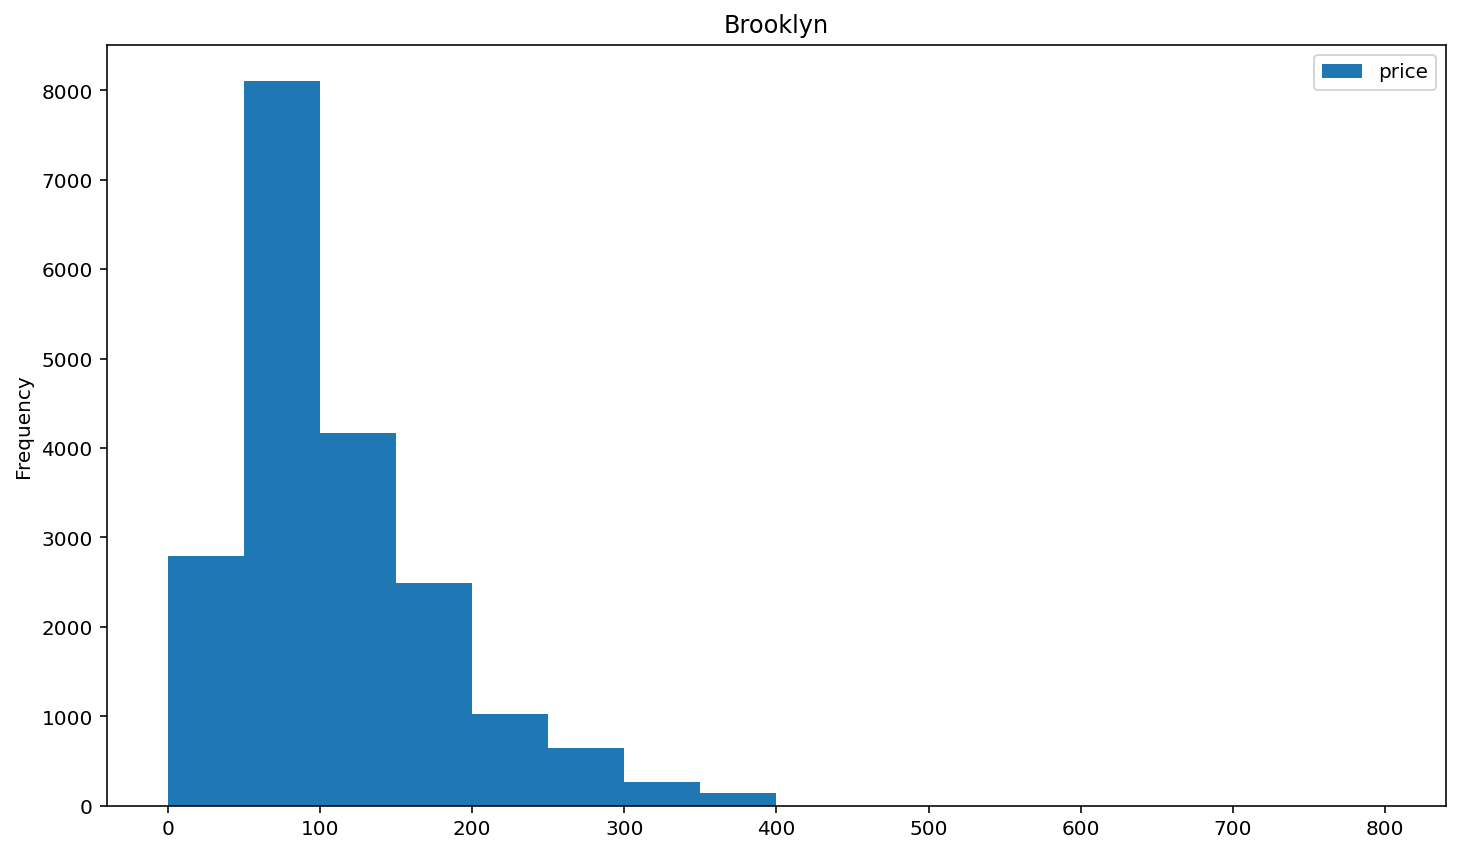

In [77]:
##plot brooklyn price distribution here
airbnb[airbnb.get('borough') == 'Brooklyn'].get(['price']).plot(kind = 'hist', title = 'Brooklyn', bins = np.arange(0, 801, 50))

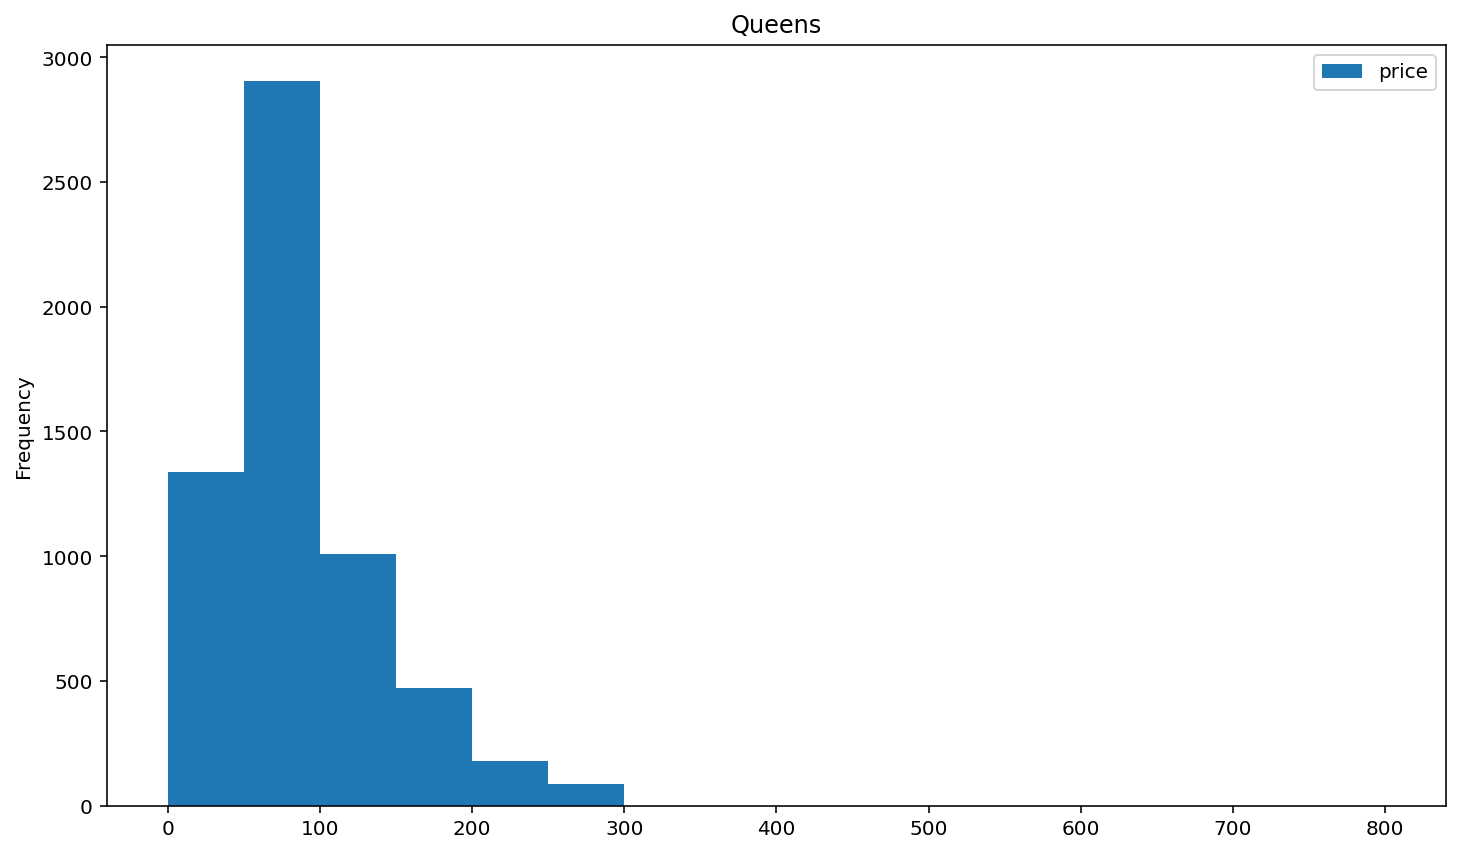

In [78]:
##plot queens price distribution here
airbnb[airbnb.get('borough') == 'Queens'].get(['price']).plot(kind = 'hist', title = 'Queens', bins = np.arange(0, 801, 50))

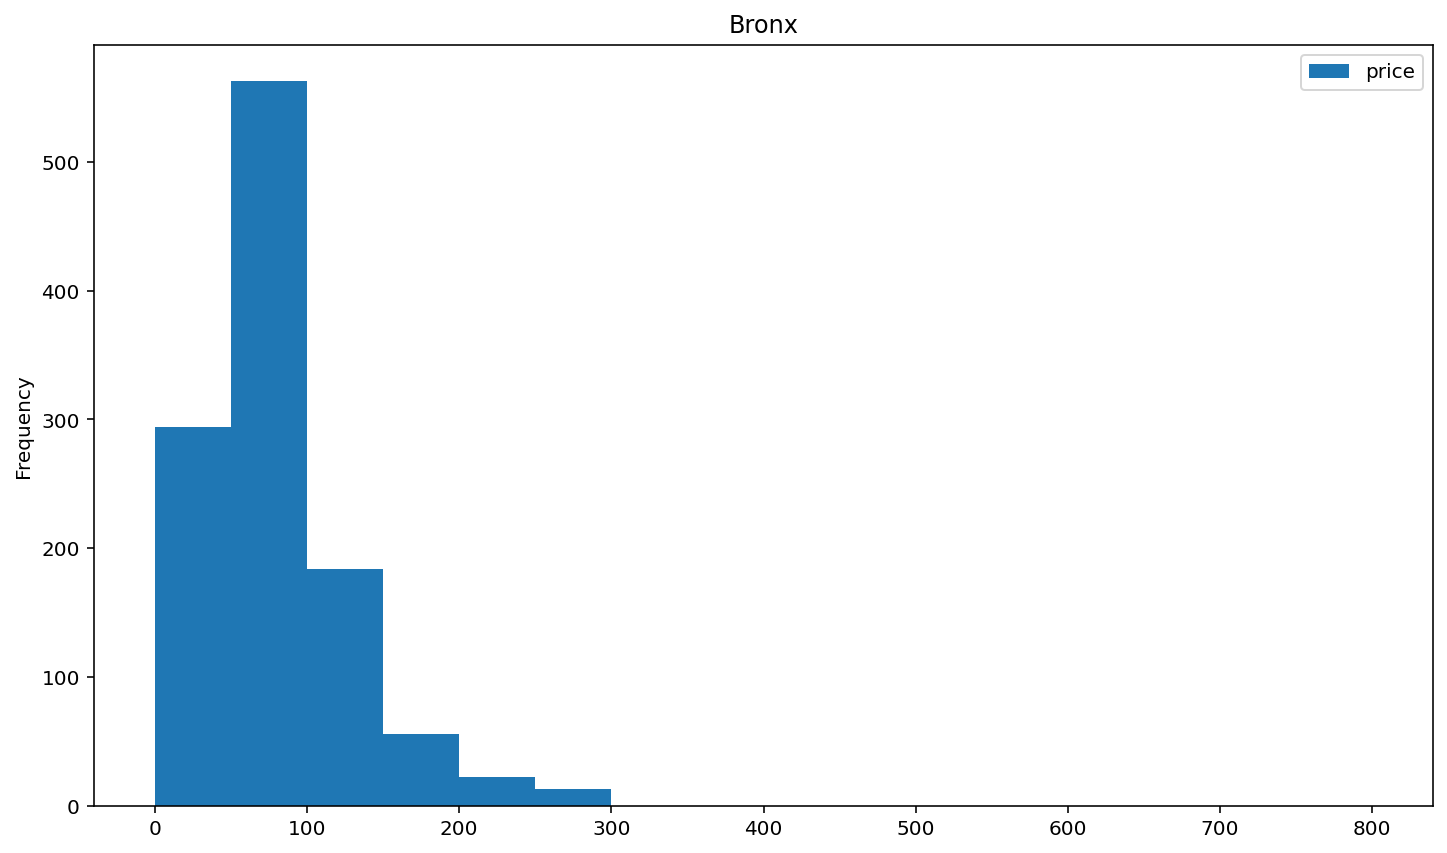

In [79]:
##plot bronx price distribution here
airbnb[airbnb.get('borough') == 'Bronx'].get(['price']).plot(kind = 'hist', title = 'Bronx', bins = np.arange(0, 801, 50))

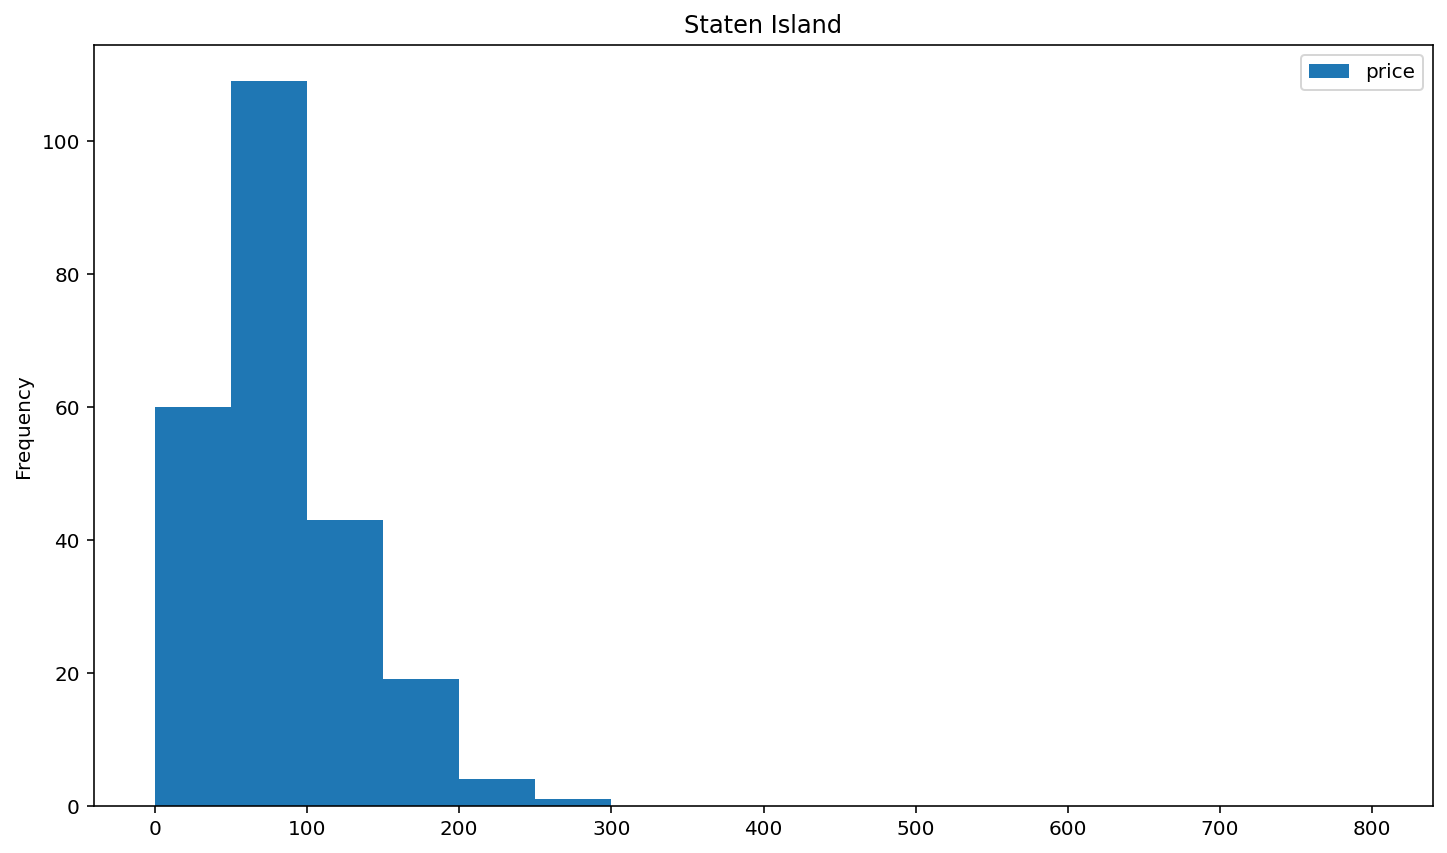

In [80]:
##plot staten island price distribution here
airbnb[airbnb.get('borough') == 'Staten Island'].get(['price']).plot(kind = 'hist', title = 'Staten Island', bins = np.arange(0, 801, 50))

### Property Type Distributions by Borough
Here, the primary question we aim to answer is whether there exists a relationship between the boroughs of NYC and the property types of the listings.

##### Most Common Property Types For Each Borough
Find the most frequently occurring property type for each borough. For each borough, conditionally extract their respective rows and apply the appropriate statistical method.

_Hint:_ There should be 5 nearly identical calls, or sets of calls-- one for each borough.

In [81]:
bronxRows = airbnb.loc[airbnb['borough'] == "Bronx"]
print(bronxRows['property_type'].mode())

brookRows = airbnb.loc[airbnb['borough'] == "Brooklyn"]
print(brookRows['property_type'].mode())

manRows = airbnb.loc[airbnb['borough'] == "Manhattan"]
print(manRows['property_type'].mode())

queensRows = airbnb.loc[airbnb['borough'] == "Queens"]
print(queensRows['property_type'].mode())

statRows = airbnb.loc[airbnb['borough'] == "Staten Island"]
print(statRows['property_type'].mode())

0    Apartment
dtype: object
0    Apartment
dtype: object
0    Apartment
dtype: object
0    Apartment
dtype: object
0    House
dtype: object


There's not much informartion that we can extract here.  The most common property type for every borough besides Staten Island was an _Apartment_. We need to extract more information from this dataset. Perhaps, it would be better if we could somehow use only the most common property types across the city, and plot the distribution of how frequently they occur for each borough. That would certainly tell us a lot more. How can we do this?

In [82]:
len(airbnb.get('property_type').unique())

40

There are 40 unique properties. Let's focus only on the five most common by their total count in the city.

##### Five Most Common Property Types in NYC
Write a line of code that returns an _array_ of the five most common property types in the city. Store your array under the variable __`property_types`__.

_Hint:_ Use the __`value_counts`__ function to retrieve the counts of every property type, __`head`__ to retrieve the top five, and __`index.values`__ to return the names of those property types

In [83]:
## fill your code in here
property_types = airbnb.get('property_type').value_counts().head().index.values
property_types

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft'],
      dtype=object)

##### Finding the Property Type Distributions by Borough
Your next task is to find the percentages of how frequently the property types found in __`property_types`__ are distributed by borough.  We have made this process a little easier for you by providing five dataframes below: __`manhattan`__, __`brooklyn`__, __`queens`__, __`bronx`__, __`staten_island`__; each dataframe contains listings whose property types are one of the five in __`property_types`__.

In [84]:
manhattan = airbnb[(airbnb.get('property_type').isin(property_types)) & (airbnb.get('borough') == 'Manhattan')]
queens = airbnb[(airbnb.get('property_type').isin(property_types)) & (airbnb.get('borough') == 'Queens')]
brooklyn = airbnb[(airbnb.get('property_type').isin(property_types)) & (airbnb.get('borough') == 'Brooklyn')]
staten_island = airbnb[(airbnb.get('property_type').isin(property_types)) & (airbnb.get('borough') == 'Staten Island')]
bronx = airbnb[(airbnb.get('property_type').isin(property_types)) & (airbnb.get('borough') == 'Bronx')]

Your task is to use the __`value_counts`__ function for each dataframe to find the percentages for how commonly occurring each property type in __`property_types`__ is in the borough. Store your answer in __`<name_of_borough>_properties`__.

In [85]:
## fill your code in here
manhattan_properties = manhattan.get('property_type').value_counts(normalize = True)*100
brooklyn_properties = brooklyn.get('property_type').value_counts(normalize = True)*100
queens_properties = queens.get('property_type').value_counts(normalize = True)*100
bronx_properties = bronx.get('property_type').value_counts(normalize = True)*100
staten_island_properties = staten_island.get('property_type').value_counts(normalize = True)*100

##### Visualizing Property Type Distributions by Borough
The code cell below plots a bar chart that visualizes the ratio of property types and the total number of property types in the borough. Do __not__ edit the cell.

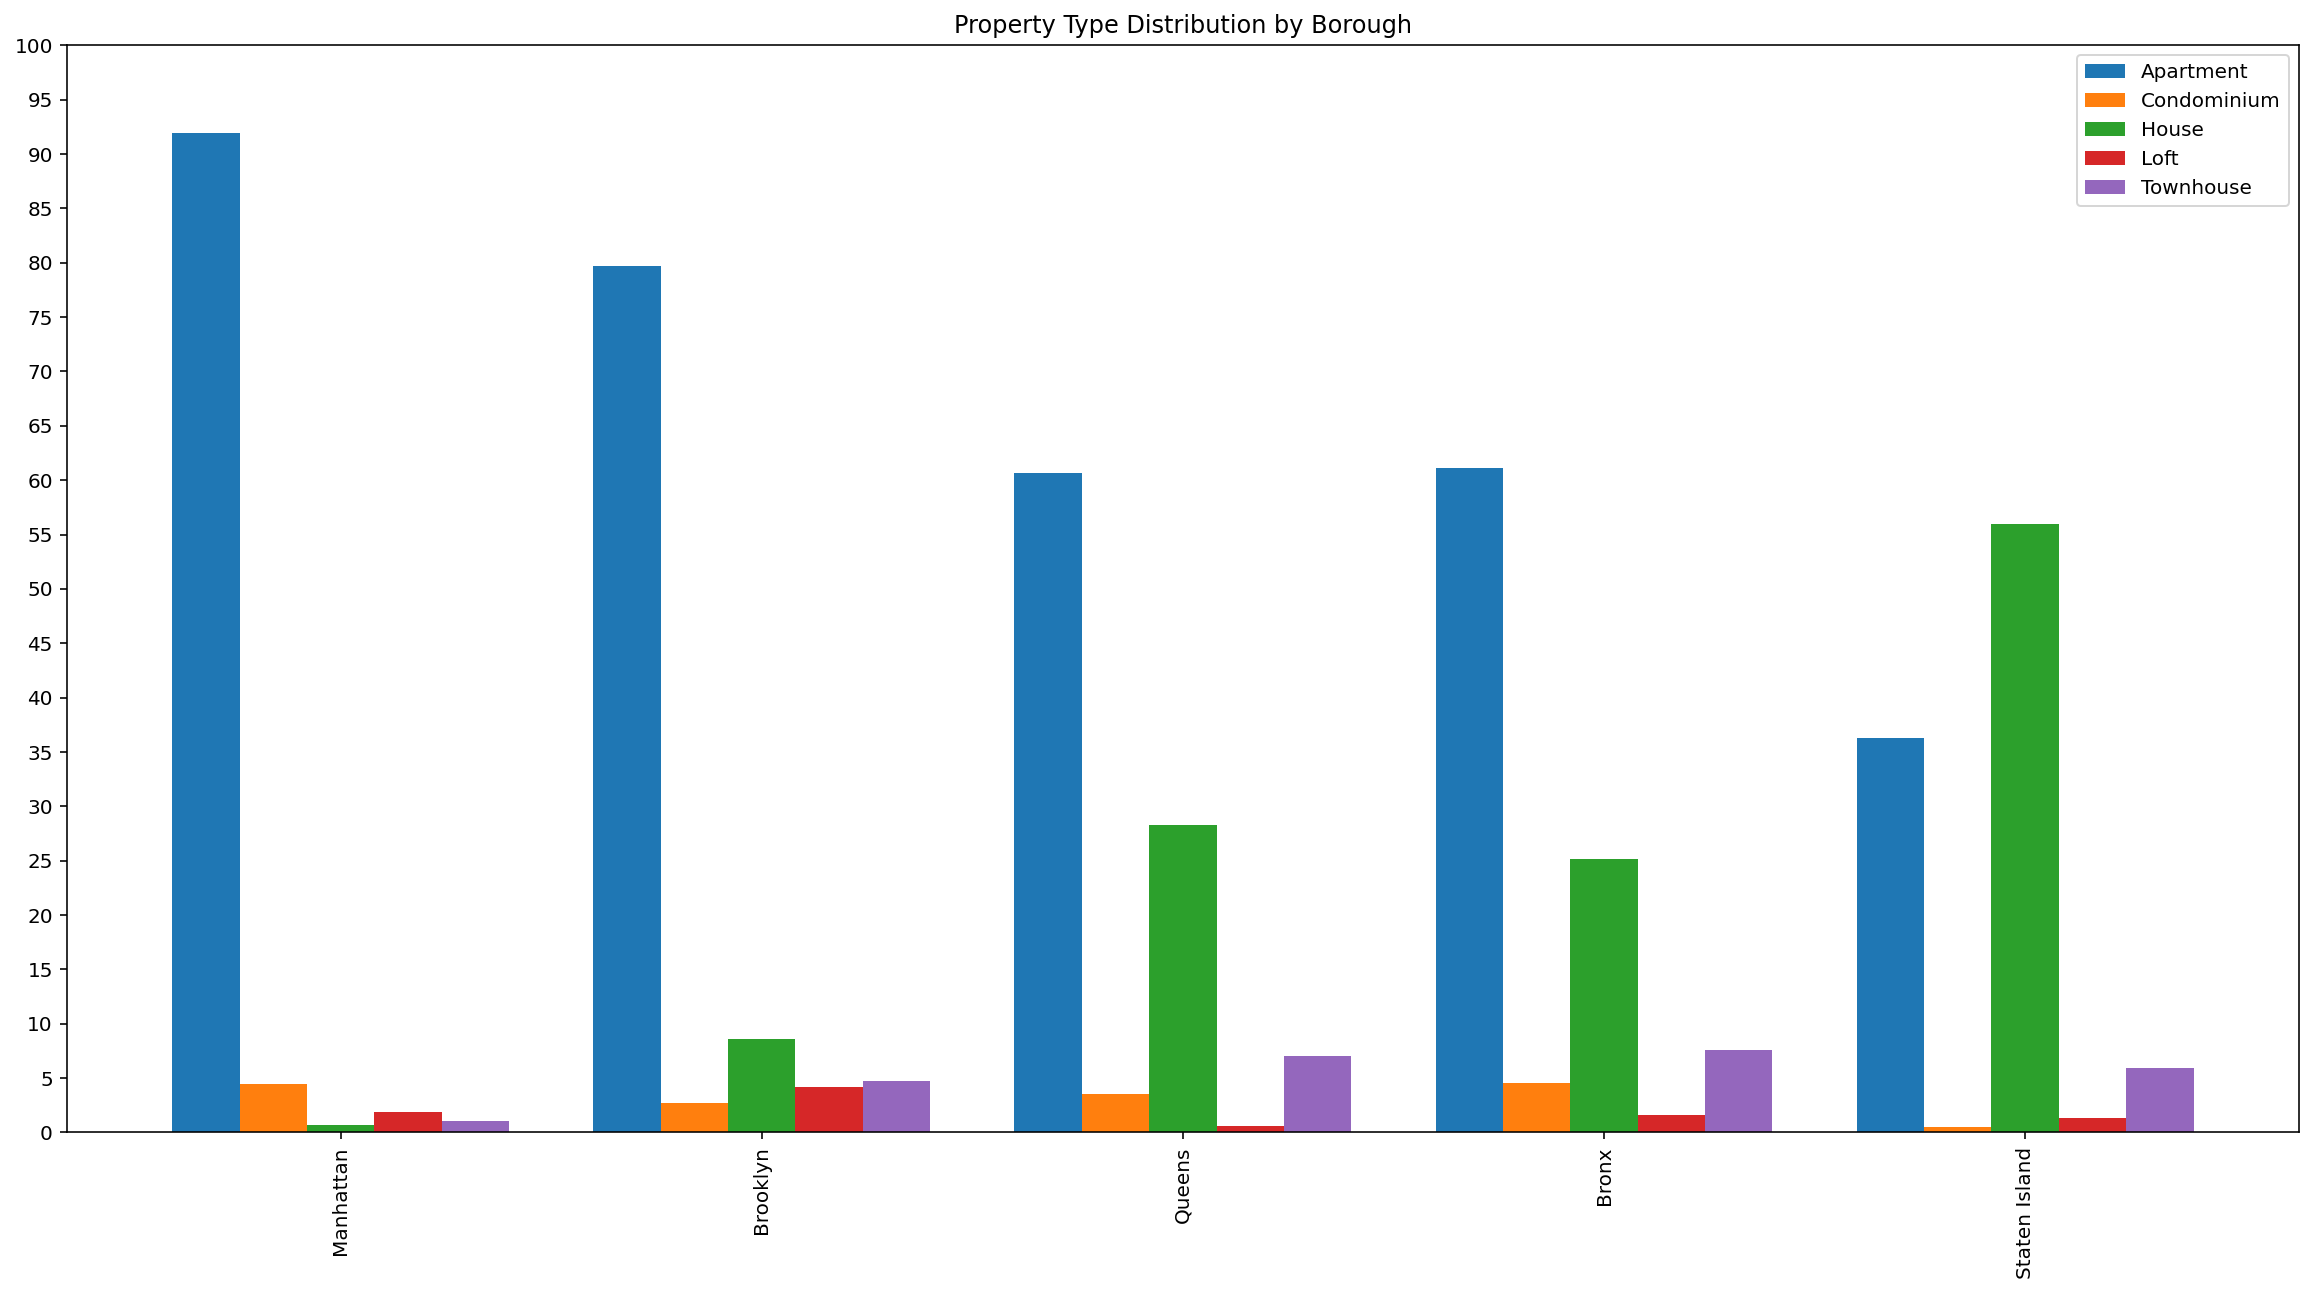

In [86]:
manhattan_dict = manhattan_properties.to_dict()
brooklyn_dict = brooklyn_properties.to_dict()
queens_dict = queens_properties.to_dict()
bronx_dict = bronx_properties.to_dict()
staten_island_dict = staten_island_properties.to_dict()
dicts = [manhattan_dict, brooklyn_dict, queens_dict, bronx_dict, staten_island_dict]

boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
visual_df = pd.DataFrame({'Apartment' : [], 'Condominium' : [], 'House' : [], 'Loft' :[], 'Townhouse' : []})
visual_df = visual_df.append(dicts).set_index([boroughs])

visual_df.plot.bar(width = 0.8, figsize = [20, 10], yticks = (np.arange(0, 100+1, 5.0)), title = 'Property Type Distribution by Borough')

### Most Expensive Neighborhoods

##### Task One
As with the previous section's tasks, you should combine listings by their neighborhood values. Then, sort the neighborhood groupings by their average prices, in descending order. From there, print only the top 5 most expensive neighborhoods and their average prices, all in a single output. 

*Hint:* Some methods you should use are **groupby, sort_values**, among others. What method should you use to print only the first 5 entries? Refer to day 3.2 if needed. 

In [87]:
## fill your code in here
byNeighborPrice = airbnb.groupby('neighborhood').mean().sort_values(by = 'price', ascending = False).get('price').head()
print(byNeighborPrice)

neighborhood
Tribeca              253.182857
NoHo                 248.317073
Flatiron District    239.056338
Midtown              227.949077
West Village         215.282192
Name: price, dtype: float64


##### Task Two
Like the boroughs section, we cannot use mode directly with groupby. Follow the same procedure as the previous section's third task, modifying it for the top 5 most expensive neighborhoods, which you should have found in the previous task. 

In [88]:
## fill your code in here
woodrowRows = airbnb[airbnb.get('neighborhood') == "Tribeca"]
print(woodrowRows['property_type'].mode())

ccRows = airbnb[airbnb['neighborhood'] == "NoHo"]
print(ccRows['property_type'].mode())

mbRows = airbnb[airbnb['neighborhood'] == "Flatiron District"]
print(mbRows['property_type'].mode())

fwRows = airbnb[airbnb['neighborhood'] == "West Village"]
print(fwRows['property_type'].mode())

pbRows = airbnb[airbnb['neighborhood'] == "Midtown"]
print(pbRows['property_type'].mode())

0    Apartment
dtype: object
0    Apartment
dtype: object
0    Apartment
dtype: object
0    Apartment
dtype: object
0    Apartment
dtype: object


In [89]:
## this isn't actually part of any task or anything
neighborpropmodes = airbnb['property_type'].groupby(airbnb['neighborhood']).agg(pd.Series.mode)

print(neighborpropmodes)


neighborhood
Allerton               House
Arrochar           Apartment
Arverne            Apartment
Astoria            Apartment
Bath Beach         Apartment
                     ...    
Williamsburg       Apartment
Windsor Terrace    Apartment
Woodhaven              House
Woodlawn           Apartment
Woodside           Apartment
Name: property_type, Length: 174, dtype: object


## 5.3) A Uni-variate KNN Model

### Applying Our Algorithm

##### Task One
Extract the listings that are in our host's listing's borough, storing them to a variable to be used later. This should be done the same way you have isolated rows in our previous tasks.

In [90]:
## fill your code in here
manhattanrows = airbnb.loc[airbnb['borough'] == "Manhattan"]

##### Task Two
Fill in the following function for our basic KNN algorithm. Use the steps outlined on Stepik as your guide. Some useful functions that you should use are: __`np.abs`__, __`sample`__, __`sort_values`__, __`iloc`__, and __`mean`__.

In [43]:
## fill your code in here
def knn(hostDF, beds):
    hostDF['distance'] = np.abs(hostDF.beds - beds)
    # Make sure to modify the following line to work with the parameter names.
    hostDF = hostDF.sample(frac=1, random_state=0)
    hostDF = hostDF.sort_values('distance')
    return(hostDF.price.iloc[:5].mean())

Complete the call to the basic KNN algorithm function that you have filled out, making sure to passing in the isolated Manhattan rows from task one, and the host's listing's number of beds.

**Checkpoint**: Use the printed value to check your work on Stepik, 5.3 Step 4.

In [44]:
print(knn(manhattanrows, 2))

155.8


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


## Evaluating Our Model


After creating partitions of the data set, follow the instructions on Stepik, 5.4 Step 3 to implement this method predicting listing prices.

In [45]:
import numpy as pd

# train_df should contain a majority of the data; test_df should contain the minority
# note: had to take a smaller chunk of the data set since otherwise runtime takes too long
train_df = airbnb.copy().iloc[:15000]
test_df = airbnb.copy().iloc[15000:20000]

## fill in your code here
def predict_price(new_listing_val,feature_col):
    temp_df = train_df
    temp_df['distance'] = np.abs(airbnb[feature_col] - new_listing_val)
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return (predicted_price)

# apply to column
test_df['predict_price'] = test_df.accommodates.apply(predict_price,feature_col = 'accommodates')
test_df['predict_price'].head()

15369     78.4
15370     78.4
15371     74.2
15372    228.0
15373     78.4
Name: predict_price, dtype: float64

In [46]:
# calculating RMSE
test_df['squared_diff'] = (test_df['predict_price'] - test_df['price'])**(2)
mse = test_df['squared_diff'].mean()
rmse = mse ** (1/2)
rmse

79.38070571618654

Comparing models: We can use RMSE to compare the results of this method on different columns:

In [47]:
for feature in ['accommodates','bedrooms','bathrooms','number_of_reviews']:
    test_df['predict_price'] = test_df.accommodates.apply(predict_price,feature_col=feature)
    ## your code here: apply the RMSE!
    test_df['squared_error'] = (test_df['predict_price'] - test_df['price'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse ** (1/2)
    print("RMSE for the {} column: {}".format(feature,rmse))

RMSE for the accommodates column: 79.38070571618654


RMSE for the bedrooms column: 108.30156888983576


RMSE for the bathrooms column: 95.62480891483995


RMSE for the number_of_reviews column: 105.07957963372408


Now, follow the instructions on Stepik, 5.4 Step 6 to implement the multivariate model.

In [48]:
from scipy.spatial import distance

def predict_price_multivar(new_listing_val,feature_cols):
    ## your code here
    temp_df = train_df
    temp_df['distance'] = distance.cdist(temp_df[feature_cols],[new_listing_val[feature_cols]])
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return (predicted_price)


cols = ['accommodates', 'bathrooms']

# RMSE calculation: this should show some improvement
test_df['predict_price'] = test_df[cols].apply(predict_price_multivar,feature_cols=cols,axis=1)
test_df['squared_diff'] = (test_df['predict_price'] - test_df['price'])**(2)
mse = test_df['squared_diff'].mean()
rmse = mse ** (1/2)
print (rmse)

73.72289006814509
